In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# # Using ipynb import functions defined in other nb
# sys.path.append("myfun/")
# from ipynb.fs.defs.myfun_load_dataset import *
# from ipynb.fs.full.myfun_models import *
# from ipynb.fs.full.myfun_nn import *
# from ipynb.fs.defs.myfun_plot import *

2023-09-12 17:01:54.547083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-08_02-31-32_df1-2-3-4-5-6-7-8-9-10_500it-POST
2023-09-09_02-13-05_df1-2-3-4-5-6-7-8-9-10_350it-POST
2023-09-09_17-34-04_df1-2-3-4-5-6-7-8-9-10-LINLOG-POST
2023-09-10_23-27-53_df1-2-3-4-5-6-7-8-9-10-LINLOG-both
2023-09-11_00-12-13_all
2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10


In [3]:
dir_nn2 = "2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

## Loading DF

### NN2

In [4]:
path = target_dir + dir_nn2
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN2 - Jupyter Notebook.pdf
info_nn2.txt


In [5]:
namefile_nn2 = "/info_nn2.txt"

In [6]:
# Construct a list for header
with open(path + namefile_nn2) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [7]:
info_nn2 = pd.read_csv(path + namefile_nn2, sep=',', usecols= header)

### NN4

In [8]:
path = target_dir + dir_nn4
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN4 - Jupyter Notebook.pdf
info_nn4.txt


In [9]:
namefile_nn4 = "/info_nn4.txt"

In [10]:
# Construct a list for header
with open(path + namefile_nn4) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [11]:
info_nn4 = pd.read_csv(path + namefile_nn4, sep=',', usecols= header)

### NN10

In [12]:
path = target_dir + dir_nn10
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN10 - Jupyter Notebook.pdf
info_nn10.txt


In [13]:
namefile_nn10 = "/info_nn10.txt"

In [14]:
# Construct a list for header
with open(path + namefile_nn10) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [15]:
info_nn10 = pd.read_csv(path + namefile_nn10, sep=',', usecols= header)

## Stats

In [16]:
# For better handling the plot
info_alldataset = pd.concat([info_nn2, info_nn4, info_nn10])

In [17]:
info_alldataset.groupby(['N. file','DOE']).mean(numeric_only=True)[['v0_scn_mean']]*3.6

v0_scn_mean
N. file DOE                    
1       [1, 10, 1]   103.981300
        [1, 2, 1]    103.985213
        [1, 4, 1]    103.987844
2       [1, 10, 1]    76.481543
        [1, 2, 1]     76.527795
        [1, 4, 1]     76.457544
3       [1, 10, 1]   105.452462
        [1, 2, 1]    105.456079
        [1, 4, 1]    105.448175
4       [1, 10, 1]    83.766860
        [1, 2, 1]     83.805244
        [1, 4, 1]     83.746191
5       [1, 10, 1]    98.366240
        [1, 2, 1]     98.386821
        [1, 4, 1]     98.338935
6       [1, 10, 1]    79.561240
        [1, 2, 1]     79.630553
        [1, 4, 1]     79.611467
7       [1, 10, 1]    96.548613
        [1, 2, 1]     96.635592
        [1, 4, 1]     96.559678
8       [1, 10, 1]    82.622718
        [1, 2, 1]     82.688465
        [1, 4, 1]     82.663905
9       [1, 10, 1]    90.944974
        [1, 2, 1]     90.992070
        [1, 4, 1]     90.950434
10      [1, 10, 1]    75.237999
        [1, 2, 1]     75.232424
        [1, 4, 1]     75.475631

In [18]:
# Averaging over DOE
info_alldataset.groupby(['N. file']).mean(numeric_only=True)[['v0_scn_mean']]*3.6

,v0_scn_mean
N. file,
1,103.984786
2,76.488961
3,105.452239
4,83.772765
5,98.363998
6,79.601087
7,96.581294
8,82.658363
9,90.962493


In [19]:
# Averaging over N.file and DOE
info_alldataset.groupby(['N. file']).mean(numeric_only=True)[['v0_scn_mean']].mean()[0]*3.6

89.3181335417148

In [20]:
# Averaging over N.file
info_alldataset.groupby(['DOE']).mean(numeric_only=True)[['v0_scn_mean']]*3.6

,v0_scn_mean
DOE,
"[1, 10, 1]",90.169342
"[1, 2, 1]",90.199893
"[1, 4, 1]",90.198263


## Plot

In [21]:
# Create the model NN
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment

# params
NUM_ITER = int(dir_nn2.split("_")[-1].split("it")[0]) #same for all the models
flag_save = True

### Create the out dir

In [22]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    df_seen_str = dir_nn2.split("_")[2]
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_{df_seen_str}_{NUM_ITER}it-PRE-nn-all")
    
    path = 'out/' + d
    os.mkdir(path)

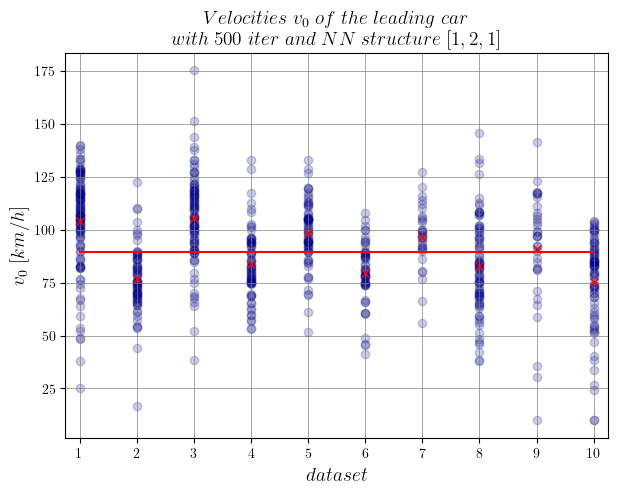

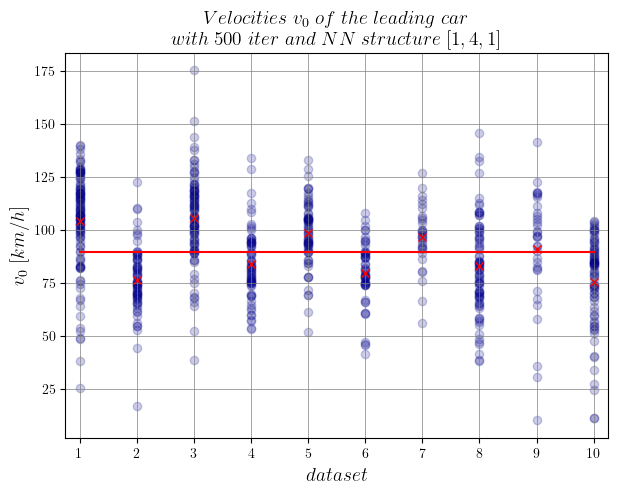

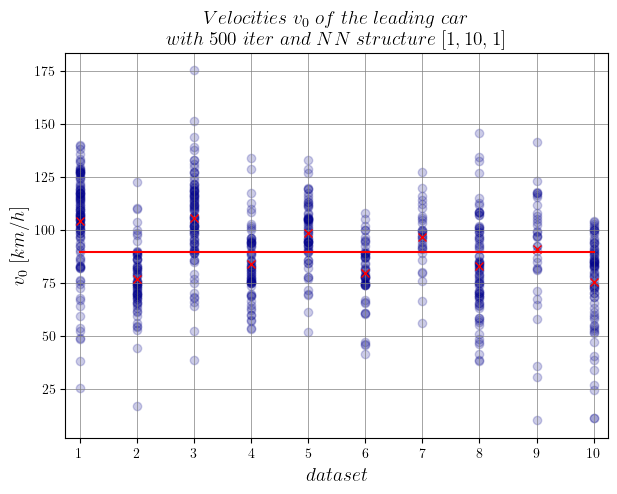

In [23]:
ms2kmh = 3.6

for d in DOE:
        
    # Initialize the figure
    width, height = 7, 5
    fig, ax = plt.subplots(figsize=(width,height))
    
#     # Before to save in csv
#     info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]   
    
    for _, scn in info_dataset.iterrows():
        
        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')  

    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$"
                   "\n"  # Newline: the backslash is interpreted as usual
                 fr"$with\ {NUM_ITER}\ iter\ and\ NN\ structure\ {str(d)}$",fontsize=14)

    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);

    plt.show()
    
    # Save figure
    if flag_save:

        title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-{str(d[1]).zfill(2)}"     
        fig.savefig(path+title+ext, bbox_inches='tight')

### Plot together

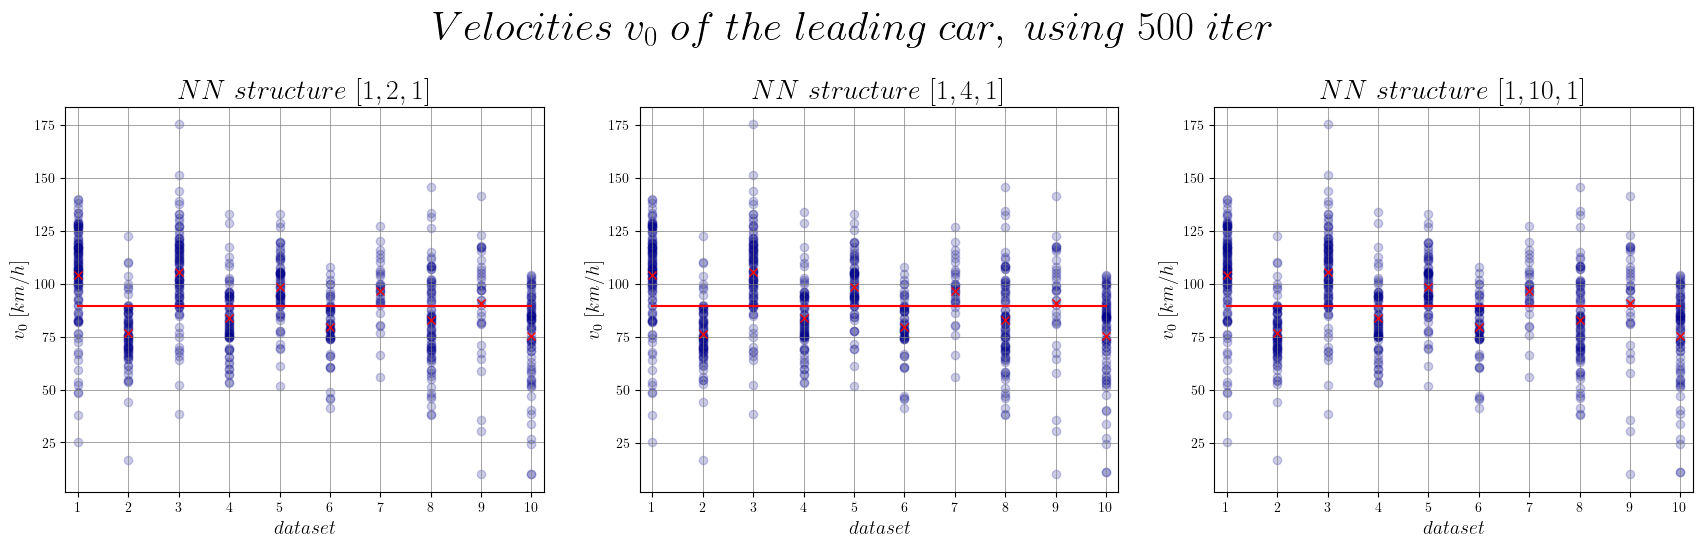

In [24]:
# define subplot grid
width, height = 7, 5
nfig = len(DOE)

fig, axes = plt.subplots(nrows=1, ncols=nfig, figsize = (width*nfig,height))
plt.subplots_adjust(hspace=0.4)

suptitle = fr"$Velocities\ v_{0}\ of\ the\ leading\ car,\ using\ {NUM_ITER}\ iter$"
fig.suptitle(suptitle, fontsize=30, y=1.075)

ms2kmh = 3.6

for ax, d in zip(axes.ravel(), DOE):

#     # Before to save in csv
#     info_dataset = info_alldataset.loc[info_alldataset['DOE'].isin([d])]
    
    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]   
    
    for _, scn in info_dataset.iterrows():

        # Convert velocities to km/h
        v0_scn_mean_kmh = scn['v0_scn_mean']*ms2kmh

        # For each scene, plot v0 mean (averagin over iterations)
        ax.scatter(scn['N. file'], v0_scn_mean_kmh, alpha = .2, color = 'darkblue');

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.plot(nf, p['v0_scn_mean']*ms2kmh, color = 'r', marker="x")

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = 'r')
        
    ax.set_xlabel(r"$data set$",fontsize=14)
    ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
    ax.set_title(fr"$NN\ structure\ {d}$",fontsize=20)

    # Limits
    xlim = [0.75,10.25]
    ax.set_xlim(xlim)
    ax.set_xticks(range(1,11))
    ylim = ax.get_ylim()

    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    
plt.show()

In [25]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}it_NN-ALL"     
    fig.savefig(path+title+ext, bbox_inches='tight')

### Plot comparing

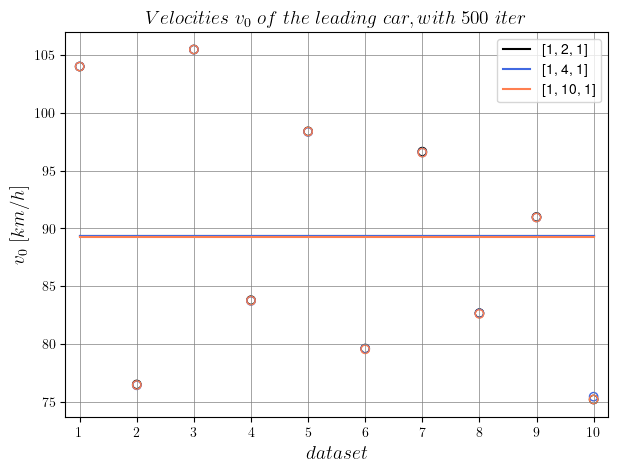

In [26]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['black', 'royalblue', 'coral']

for step, d in enumerate(DOE):   

    # Using csv..
    info_dataset = info_alldataset.loc[info_alldataset['DOE'] == str(d)]
    
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0_scn_mean']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=str(d))

ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car, with\ {NUM_ITER}\ iter$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

In [27]:
# Save figure
if flag_save:

    title = f"/v0_df{df_seen_str}_{NUM_ITER}iter_NN-ALL-comparing"
    fig.savefig(path+title+ext, bbox_inches='tight')